In [106]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [107]:
data=pd.read_csv("covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# EDA & Preprocessing

In [42]:
data.shape

(9117, 8)

In [4]:
data.info

<bound method DataFrame.info of        SNo ObservationDate Province/State  Country/Region  \
0        1      01/22/2020          Anhui  Mainland China   
1        2      01/22/2020        Beijing  Mainland China   
2        3      01/22/2020      Chongqing  Mainland China   
3        4      01/22/2020         Fujian  Mainland China   
4        5      01/22/2020          Gansu  Mainland China   
...    ...             ...            ...             ...   
9112  9113      03/26/2020        Wyoming              US   
9113  9114      03/26/2020       Xinjiang  Mainland China   
9114  9115      03/26/2020          Yukon          Canada   
9115  9116      03/26/2020         Yunnan  Mainland China   
9116  9117      03/26/2020       Zhejiang  Mainland China   

              Last Update  Confirmed  Deaths  Recovered  
0         1/22/2020 17:00        1.0     0.0        0.0  
1         1/22/2020 17:00       14.0     0.0        0.0  
2         1/22/2020 17:00        6.0     0.0        0.0  
3  

In [108]:
data.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [115]:
data['ObservationDate']=pd.to_datetime(data['ObservationDate'],format = "%m/%d/%Y")
data.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [116]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [117]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,9117.000000,9117.000000,9117.000000,9117.000000
mean,4559.000000,766.820774,28.791927,255.273994
std,2631.995536,5322.616735,283.310806,2838.560708
min,1.000000,0.000000,0.000000,0.000000
25%,2280.000000,2.000000,0.000000,0.000000
50%,4559.000000,21.000000,0.000000,0.000000
75%,6838.000000,162.000000,1.000000,10.000000
max,9117.000000,80589.000000,8215.000000,61201.000000


In [119]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     4088
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [130]:
#Total deaths by date
td_date=data.groupby('ObservationDate')['Deaths'].sum()
td_date.head()

ObservationDate
2020-01-22    17.0
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
Name: Deaths, dtype: float64

In [132]:
#Avg confirmed cases rate by date
ac_date=data.groupby('ObservationDate')['Confirmed'].mean()
ac_date.head()

ObservationDate
2020-01-22    14.605263
2020-01-23    14.195652
2020-01-24    22.951220
2020-01-25    32.681818
2020-01-26    45.063830
Name: Confirmed, dtype: float64

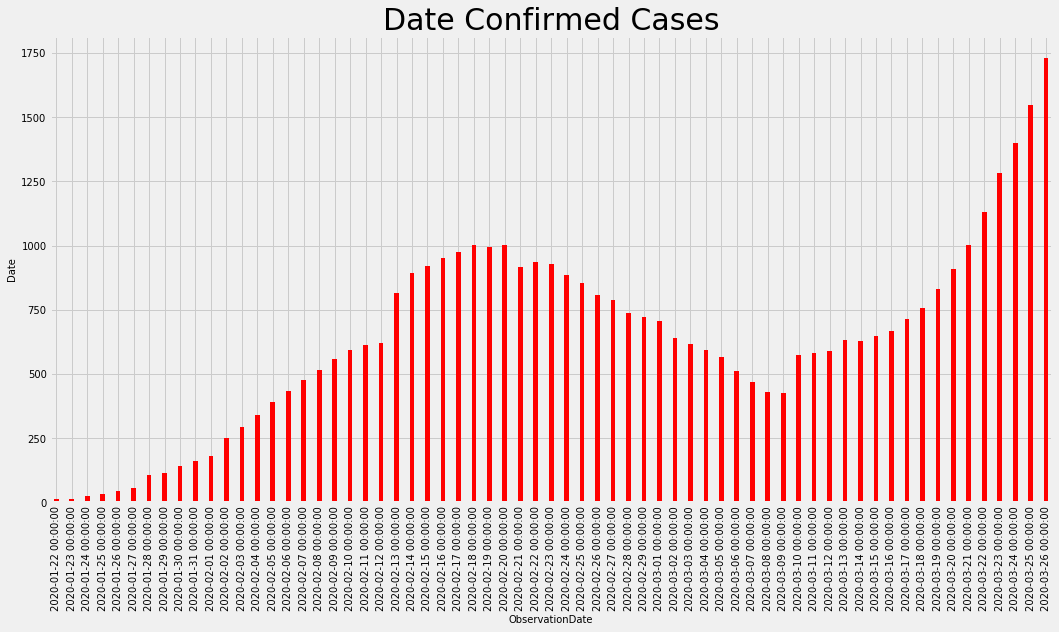

In [133]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ac_date.plot('bar', color='r',width=0.3,title='Date Confirmed Cases', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

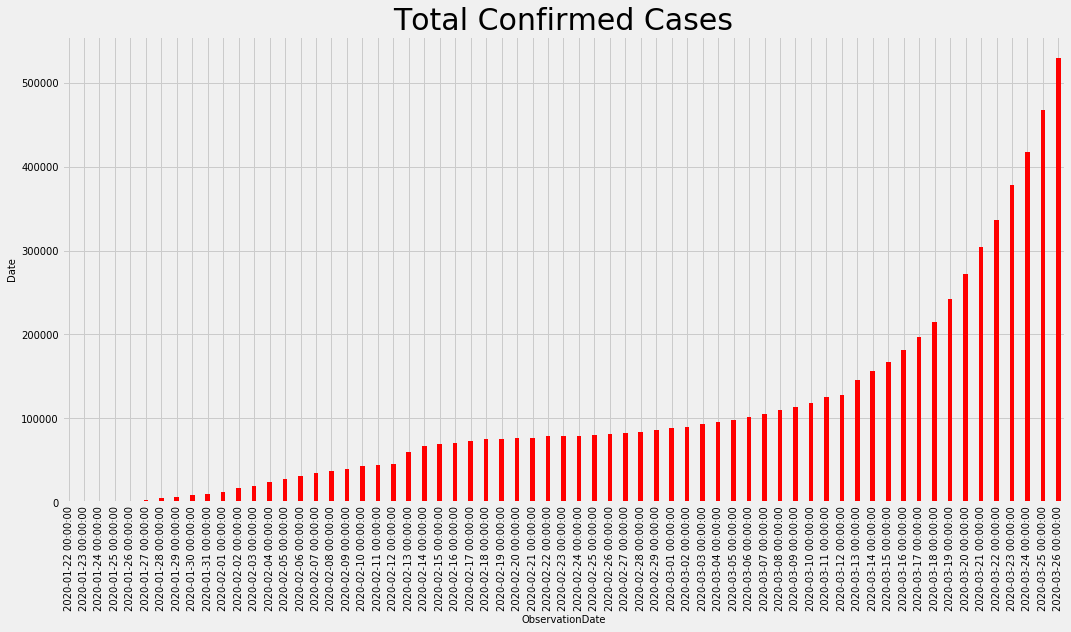

In [134]:
#Total confirmed cases rate by date
tc_date=data.groupby('ObservationDate')['Confirmed'].sum()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
tc_date.plot('bar', color='r',width=0.3,title='Total Confirmed Cases', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

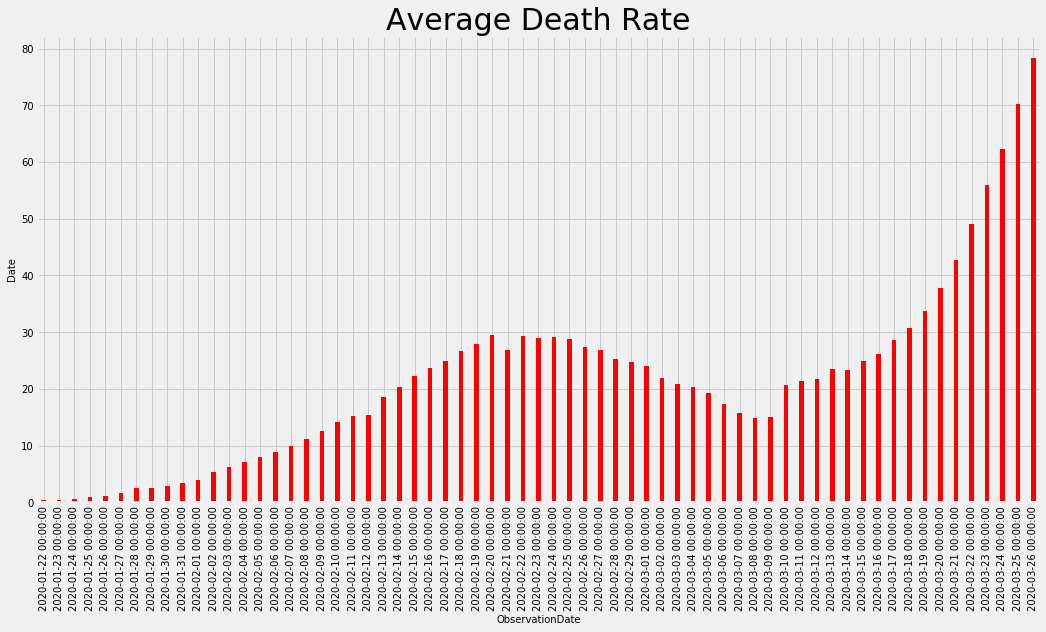

In [135]:
#Avg confirmed cases rate by date
ad_date=data.groupby('ObservationDate')['Deaths'].mean()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ad_date.plot('bar', color='r',width=0.3,title='Average Death Rate', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

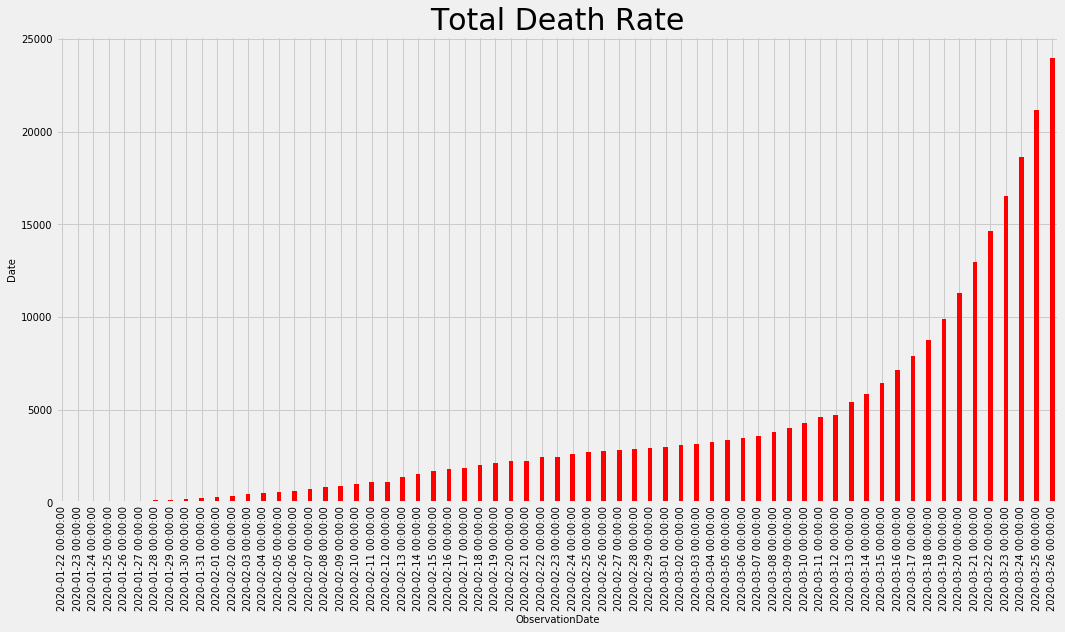

In [136]:
#Total death rate by date
td_date=data.groupby('ObservationDate')['Deaths'].sum()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
td_date.plot('bar', color='r',width=0.3,title='Total Death Rate', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

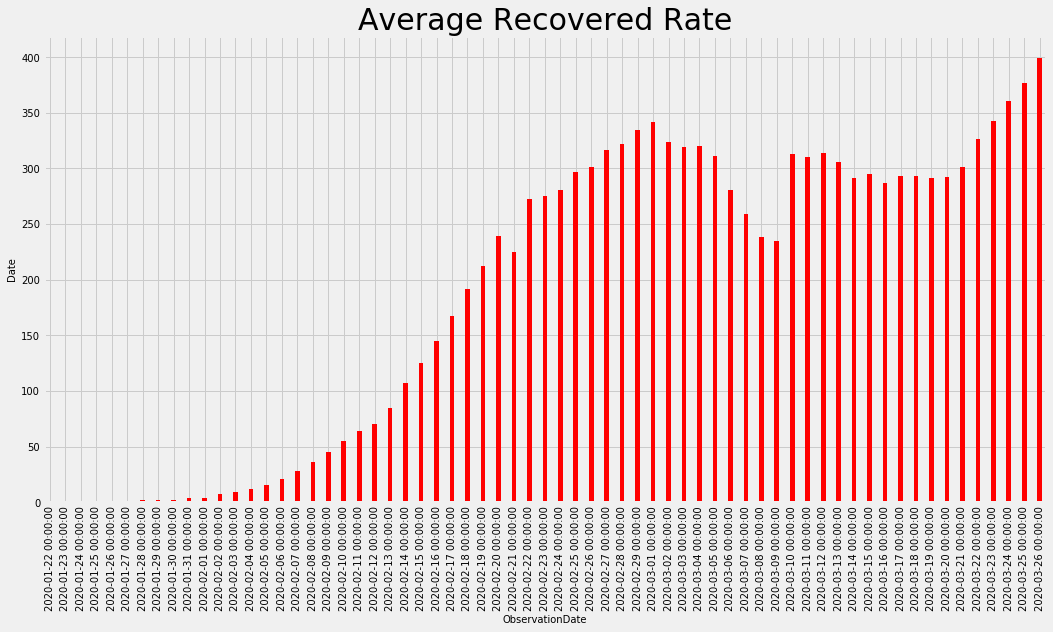

In [137]:
#Avg recovered cases rate by date
ar_date=data.groupby('ObservationDate')['Recovered'].mean()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ar_date.plot('bar', color='r',width=0.3,title='Average Recovered Rate', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

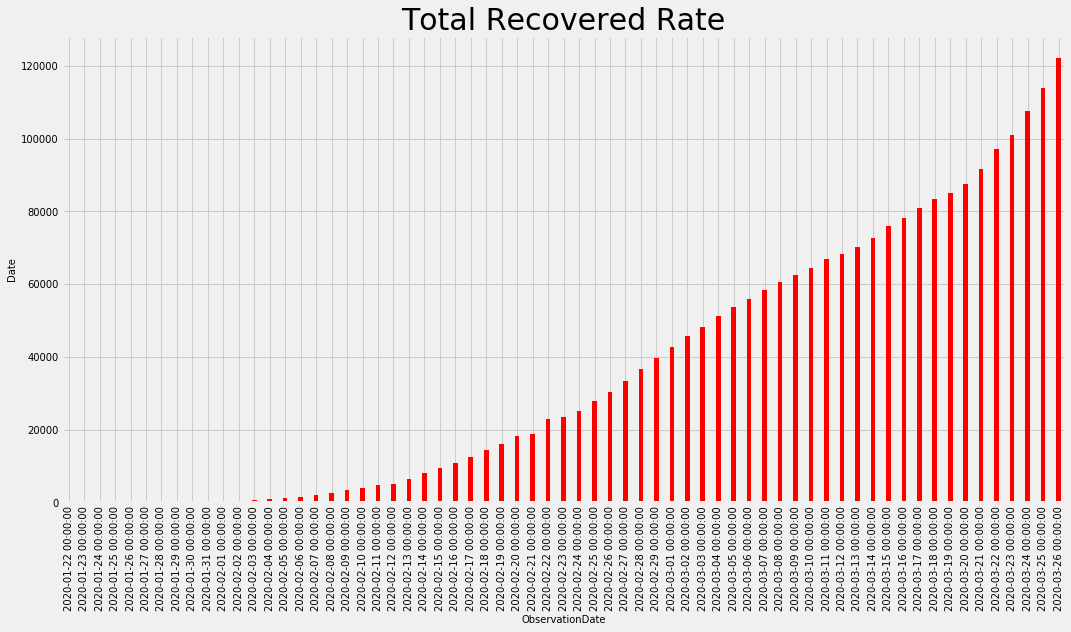

In [138]:
#Total recovered cases rate by date
#Avg recovered cases rate by date
tr_date=data.groupby('ObservationDate')['Recovered'].sum()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
tr_date.plot('bar', color='r',width=0.3,title='Total Recovered Rate', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

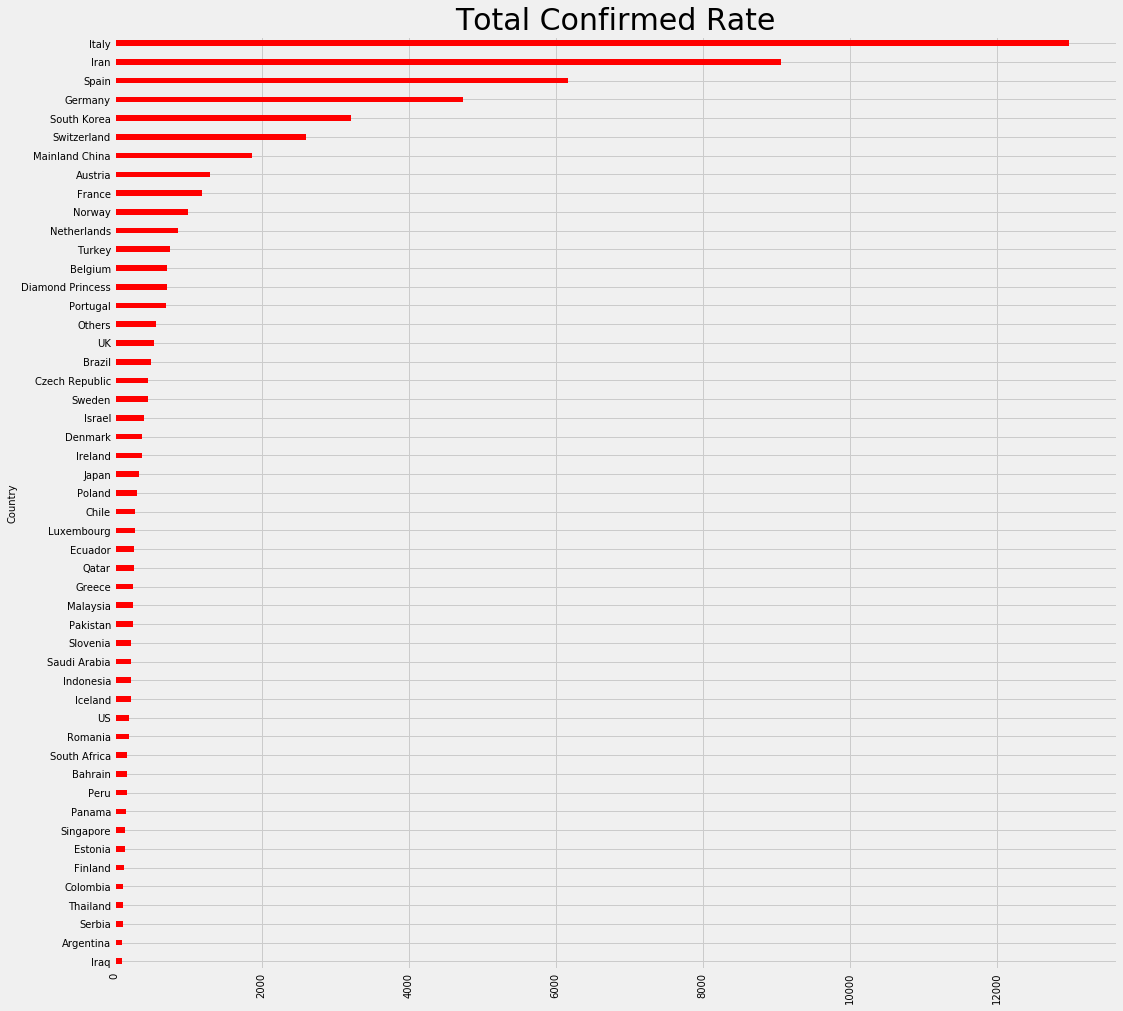

In [141]:
#Avg confirmed cases per country for top 50countries
acc=data.groupby('Country/Region')['Confirmed'].mean()
acc=acc.sort_values(ascending=False)
acc50=acc.head(50).sort_values(ascending=True)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
acc50.plot('barh', color='r',width=0.3,title='Total Confirmed Rate', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Country')


ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
acc=data.groupby('Country/Region')['Confirmed'].mean()
acc=acc.sort_values(ascending=False)
acc50=acc.head(50).sort_values(ascending=True)

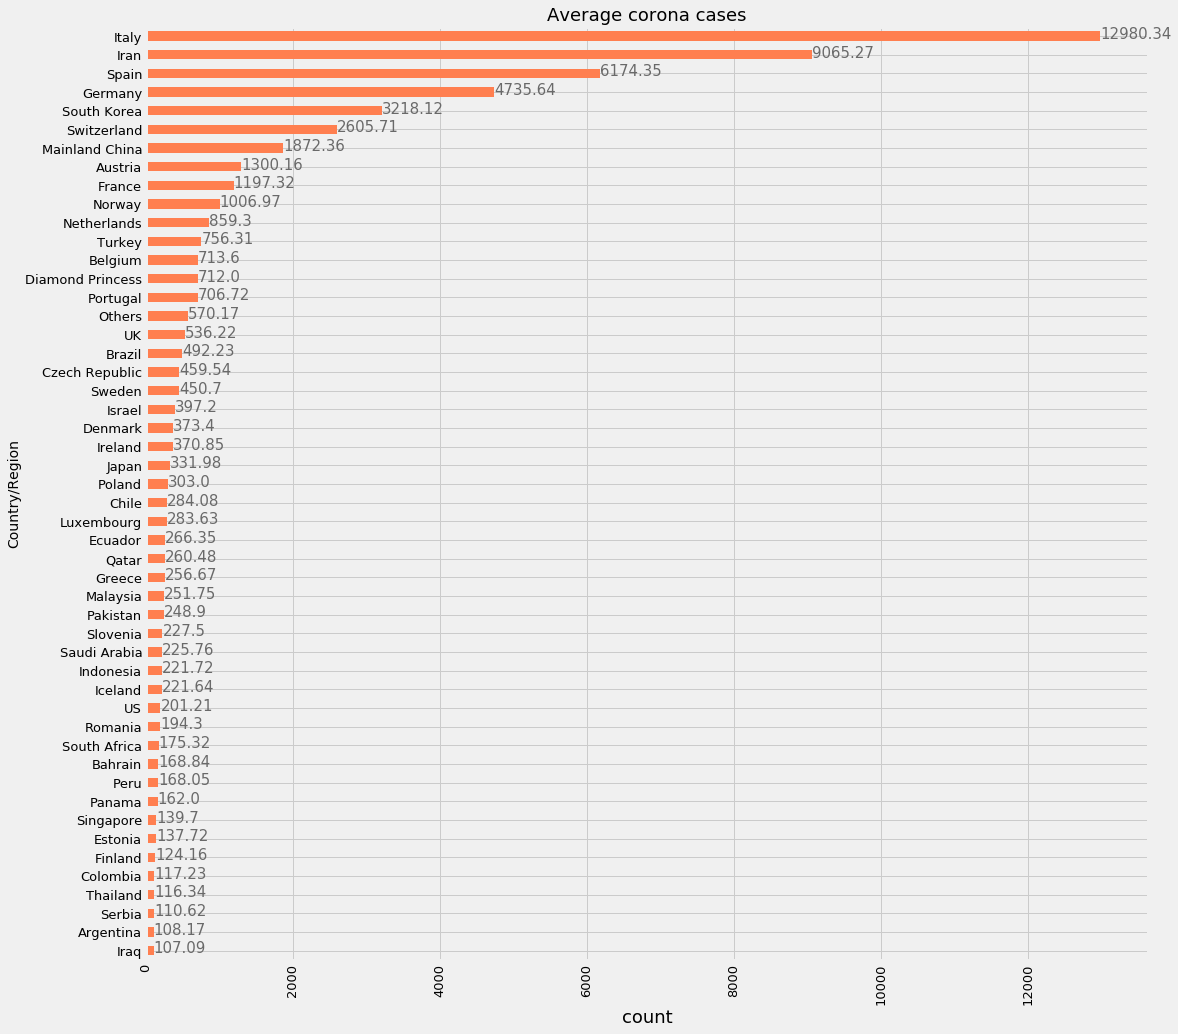

In [143]:
acc=data.groupby('Country/Region')['Confirmed'].mean()
acc=acc.sort_values(ascending=False)
acc50=acc.head(50)
acc50.head()

ax = acc50.plot(kind='barh', figsize=(16,16),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Average corona cases", fontsize=18)
ax.set_xlabel("count", fontsize=18);
plt.xticks(rotation = 90)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

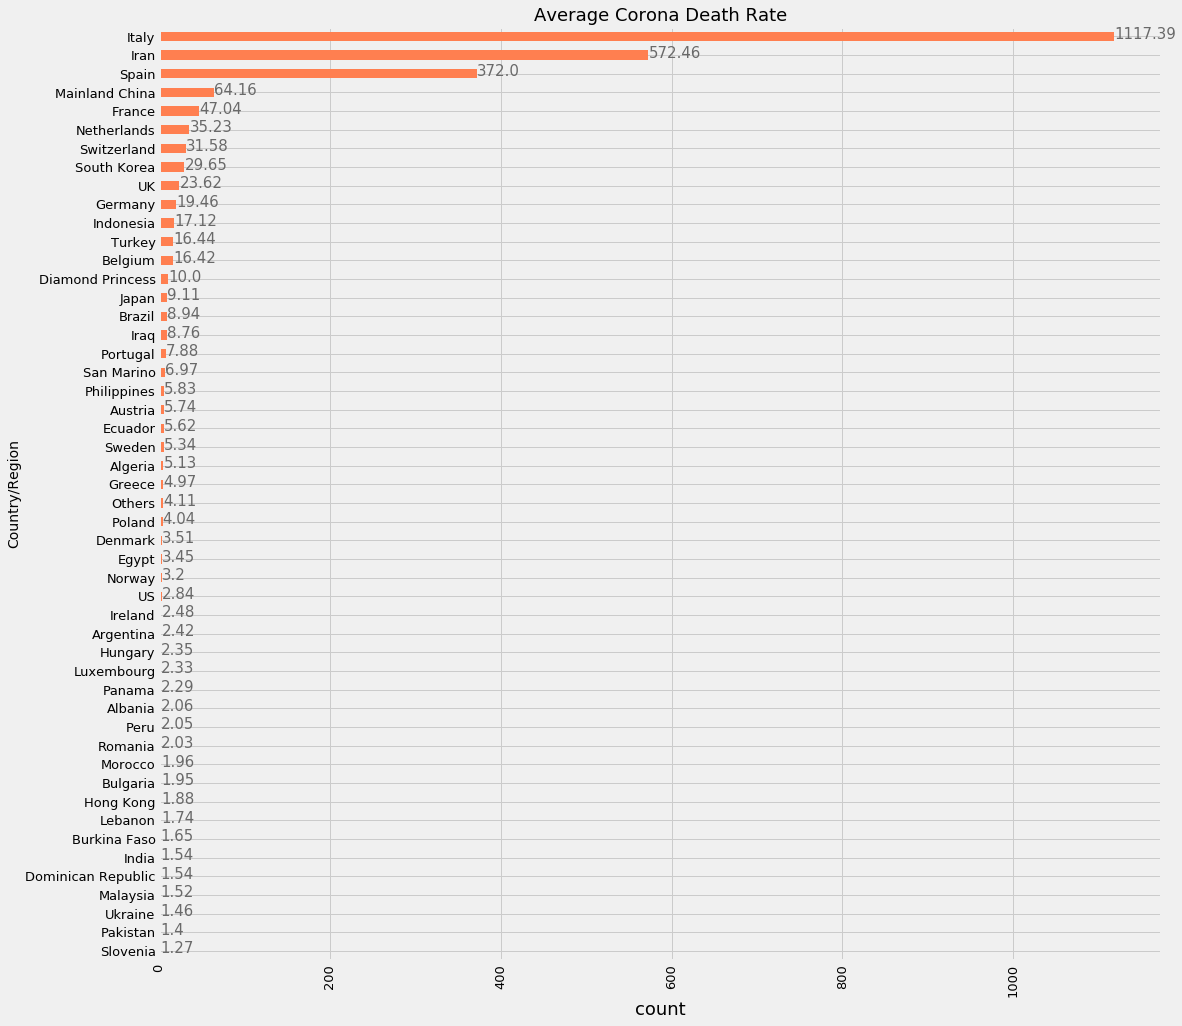

In [144]:
#Death Rate per Country
acc=data.groupby('Country/Region')['Deaths'].mean()
acc=acc.sort_values(ascending=False)
acc50=acc.head(50)
acc50.head()

ax = acc50.plot(kind='barh', figsize=(16,16),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Average Corona Death Rate", fontsize=18)
ax.set_xlabel("count", fontsize=18);
plt.xticks(rotation = 90)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

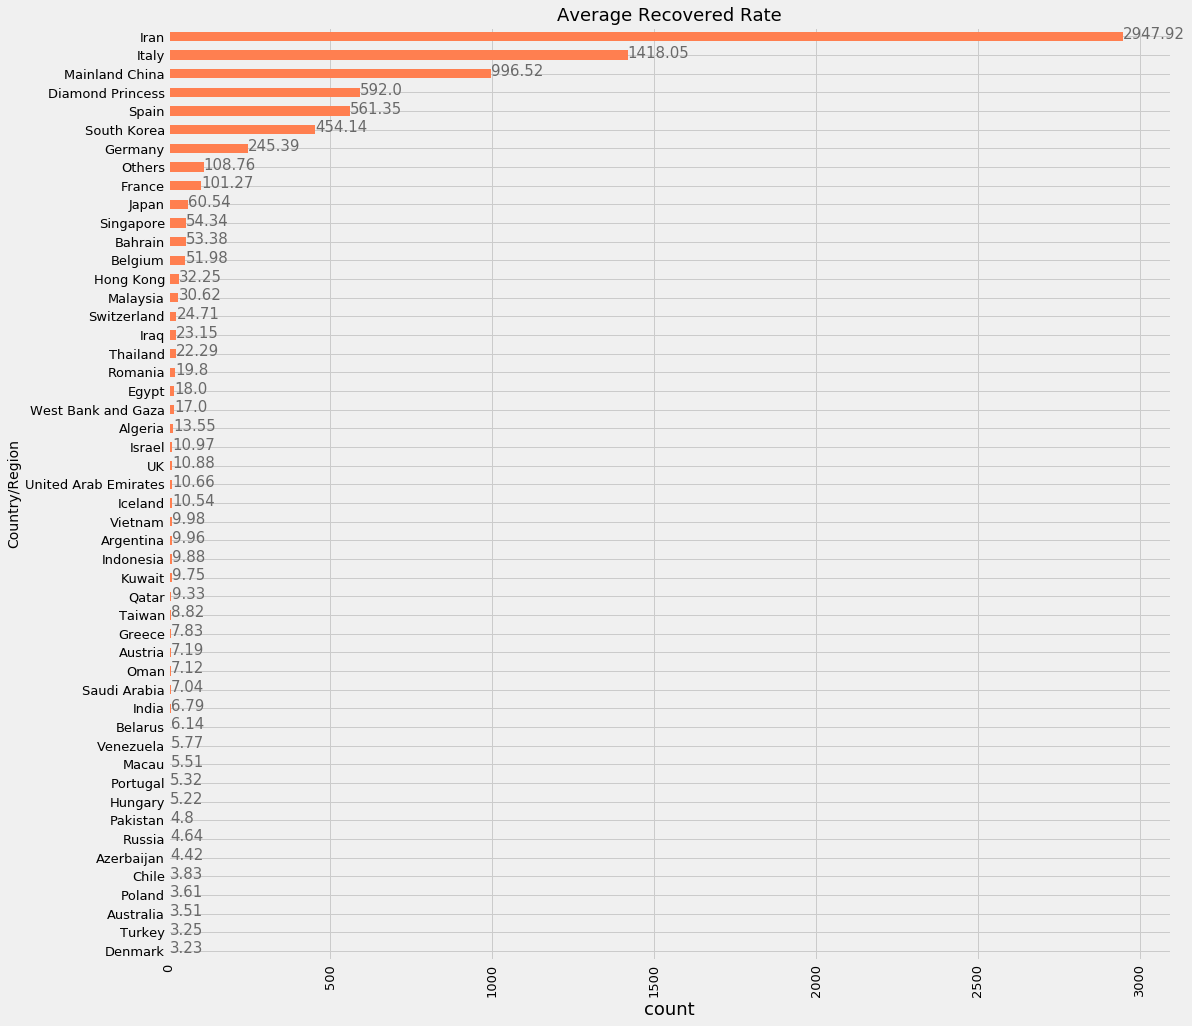

In [145]:
#Recovered Rate per Country
acc=data.groupby('Country/Region')['Recovered'].mean()
acc=acc.sort_values(ascending=False)
acc50=acc.head(50)
acc50.head()

ax = acc50.plot(kind='barh', figsize=(16,16),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Average Recovered Rate", fontsize=18)
ax.set_xlabel("count", fontsize=18);
plt.xticks(rotation = 90)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# COVID-19 cases in US, China, Italy, UK

In [146]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [147]:
data=data.drop(['SNo','Last Update'],axis=1)
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [151]:
#US
us_con= data[data['Country/Region']=='US'].groupby(['ObservationDate']).agg({'Confirmed':['sum']})
us_death = data[data['Country/Region']=='US'].groupby(['ObservationDate']).agg({'Deaths':['sum']})
total_date_US = us_con.join(us_death)
total_date_US.head()

,Confirmed,Deaths
,sum,sum
ObservationDate,,
2020-01-22,1.0,0.0
2020-01-23,1.0,0.0
2020-01-24,2.0,0.0
2020-01-25,2.0,0.0
2020-01-26,5.0,0.0


In [150]:
#China
us_con= data[data['Country/Region']=='Mainland China'].groupby(['ObservationDate']).agg({'Confirmed':['sum']})
us_death = data[data['Country/Region']=='Mainland China'].groupby(['ObservationDate']).agg({'Deaths':['sum']})
total_date_China = us_con.join(us_death)
total_date_China.head()

,Confirmed,Deaths
,sum,sum
ObservationDate,,
2020-01-22,547.0,17.0
2020-01-23,639.0,18.0
2020-01-24,916.0,26.0
2020-01-25,1399.0,42.0
2020-01-26,2062.0,56.0


In [149]:
#Italy
us_con= data[data['Country/Region']=='Italy'].groupby(['ObservationDate']).agg({'Confirmed':['sum']})
us_death = data[data['Country/Region']=='Italy'].groupby(['ObservationDate']).agg({'Deaths':['sum']})
total_date_Italy = us_con.join(us_death)
total_date_Italy.head()

,Confirmed,Deaths
,sum,sum
ObservationDate,,
2020-01-31,2.0,0.0
2020-02-01,2.0,0.0
2020-02-02,2.0,0.0
2020-02-03,2.0,0.0
2020-02-04,2.0,0.0


In [153]:
#India

us_con= data[data['Country/Region']=='India'].groupby(['ObservationDate']).agg({'Confirmed':['sum']})
us_death = data[data['Country/Region']=='India'].groupby(['ObservationDate']).agg({'Deaths':['sum']})
total_date_India = us_con.join(us_death)
print(total_date_India.shape)
total_date_India.head()

(57, 2)


,Confirmed,Deaths
,sum,sum
ObservationDate,,
2020-01-30,1.0,0.0
2020-01-31,1.0,0.0
2020-02-01,1.0,0.0
2020-02-02,2.0,0.0
2020-02-03,3.0,0.0


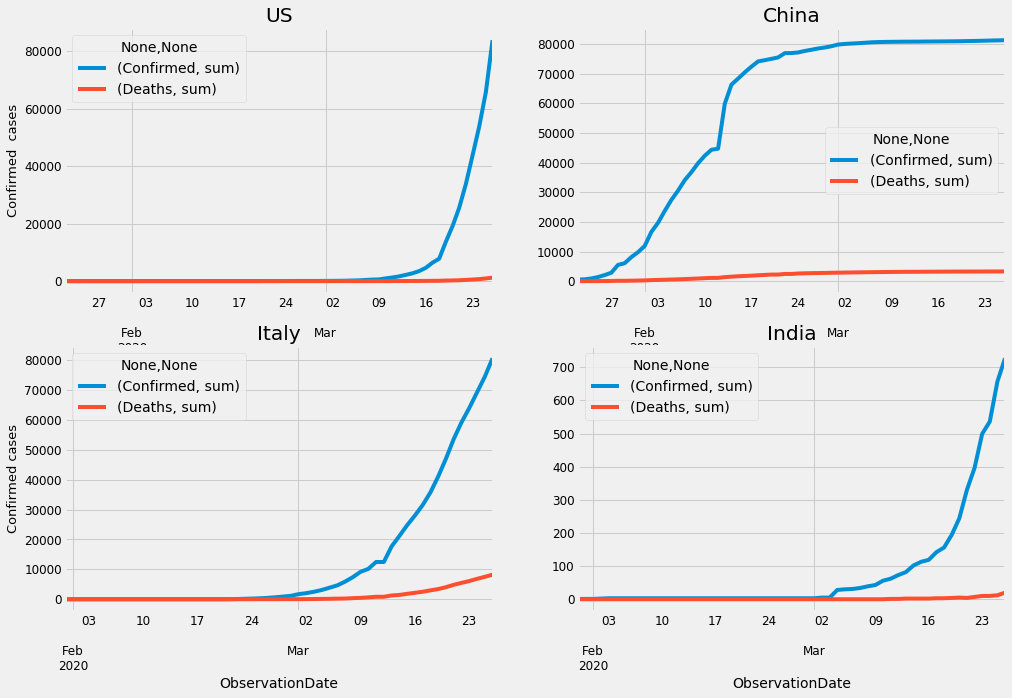

In [154]:

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_US.plot(ax=plt.gca(), title='US')
plt.ylabel("Confirmed  cases", size=13)

plt.subplot(2, 2, 2)
total_date_China.plot(ax=plt.gca(), title='China')

plt.subplot(2, 2, 3)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 4)
total_date_India.plot(ax=plt.gca(), title='India')


In [155]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [156]:
data.rename(columns = {'ObservationDate':'Date'}, inplace = True)
data.head()

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [63]:
#Partition data into train and test
point = int(0.9 * len(data))
train,test = data[:point], data[point:]
train.shape,test.shape

((8205, 6), (912, 6))

In [64]:
#Frequency distribution of Confrirmed cases"
train_outcome_Conf = pd.crosstab(index=train["Confirmed"],columns="count")
train_outcome_Conf

col_0,count
Confirmed,
0.0,190
1.0,1456
2.0,626
3.0,349
4.0,226
...,...
67790.0,1
67794.0,1
67798.0,1


In [35]:
#Frequency distribution of death cases"
train_outcome_deaths = pd.crosstab(index=train["Deaths"],columns="count")      # Name the count column

train_outcome_deaths

col_0,count
Deaths,
0.0,5606
1.0,927
2.0,398
3.0,268
4.0,152
...,...
3405.0,1
4032.0,1
4825.0,1


In [36]:
data['Date'].max(),data['Date'].min()

('03/26/2020', '01/22/2020')

In [157]:
data.dtypes

Date              datetime64[ns]
Province/State            object
Country/Region            object
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [158]:
con = data.set_index('Date')
con.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


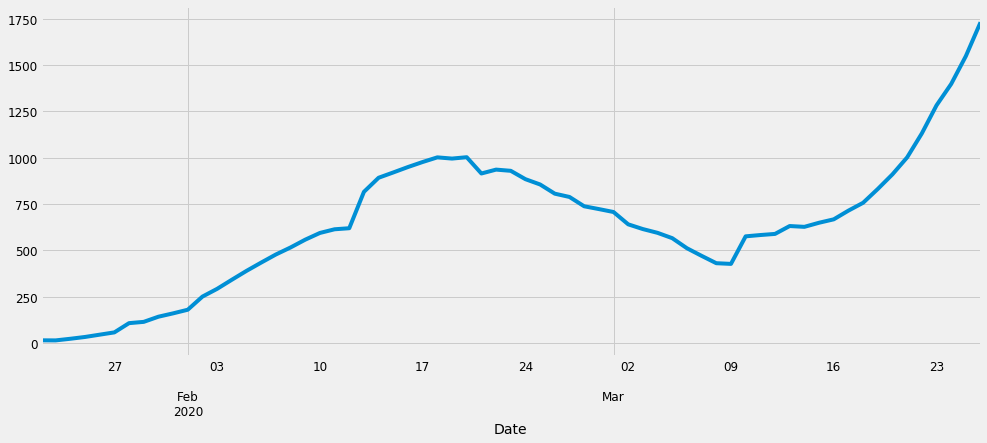

In [159]:
#Data visualization
y = con['Confirmed'].resample('D').mean()
y.plot(figsize=(15, 6))
plt.show()

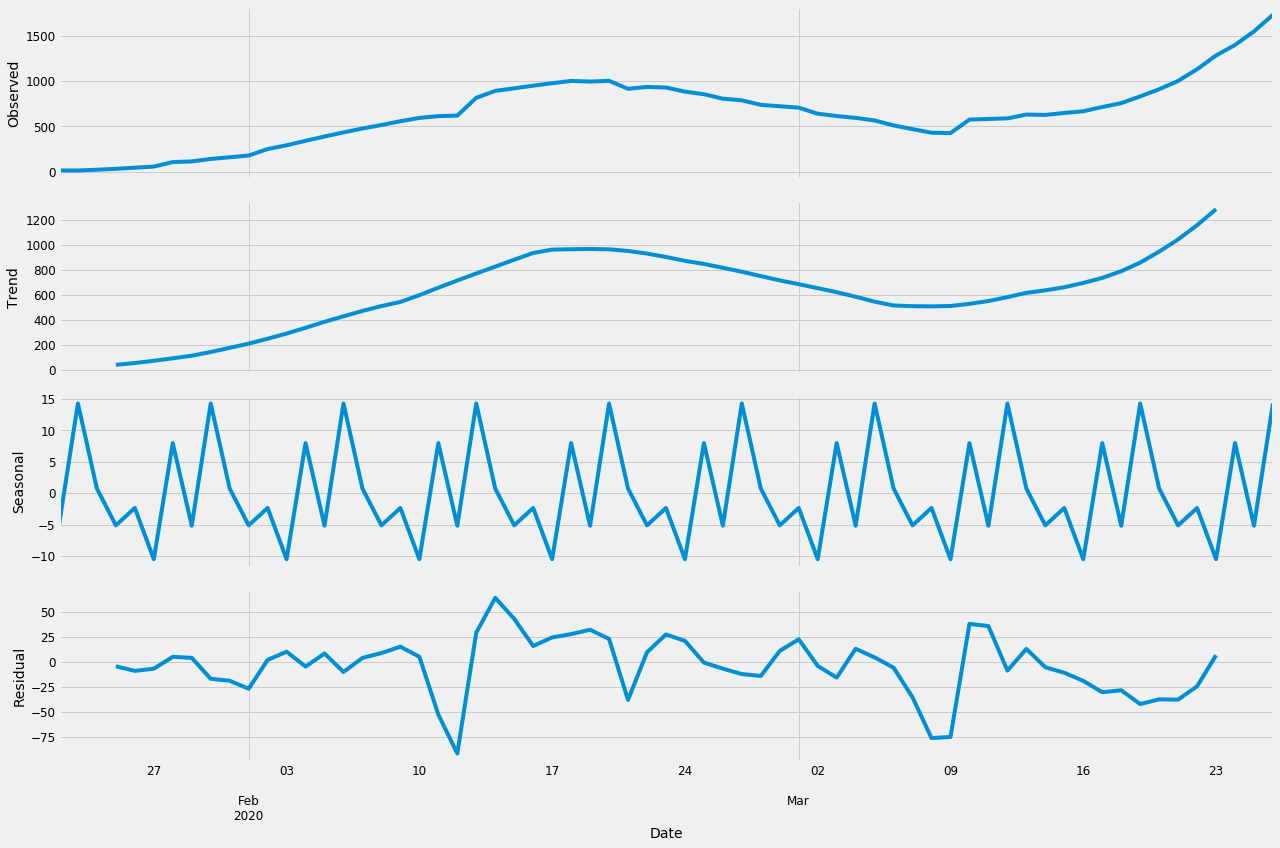

In [160]:
#We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [161]:
#Time series forecasting with ARIMA
import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [162]:
#This step is parameter Selection for our prediction of Confirmed Corona Cases ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1030.255778460035
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:850.7761320184902
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:785.3996695363004
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:602.8884195846497
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:800.9429994909142
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:775.740023500538
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:620.2338042415118
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:601.4621017155647
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:937.092684085603
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:743.7068810756813
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:709.2297858286198
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:539.6624150264046
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:737.9057980157681
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:701.8913766111382
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:570.8250344746973
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:541.658518692437
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:705.1573274253036
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:579.3286647632245
ARIMA(0, 1, 0

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:412.9077244835437
The above output suggests that ARIMA(1, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value of  - AIC:412.9077244835437. Therefore we should consider this to be optimal option.

In [163]:
#Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0242      0.083     12.397      0.000       0.862       1.186
ma.L1         -0.5734      0.225     -2.546      0.011      -1.015      -0.132
ma.S.L12      -1.0000      0.176     -5.680      0.000      -1.345      -0.655
sigma2      1851.9620   9.51e-05   1.95e+07      0.000    1851.962    1851.962


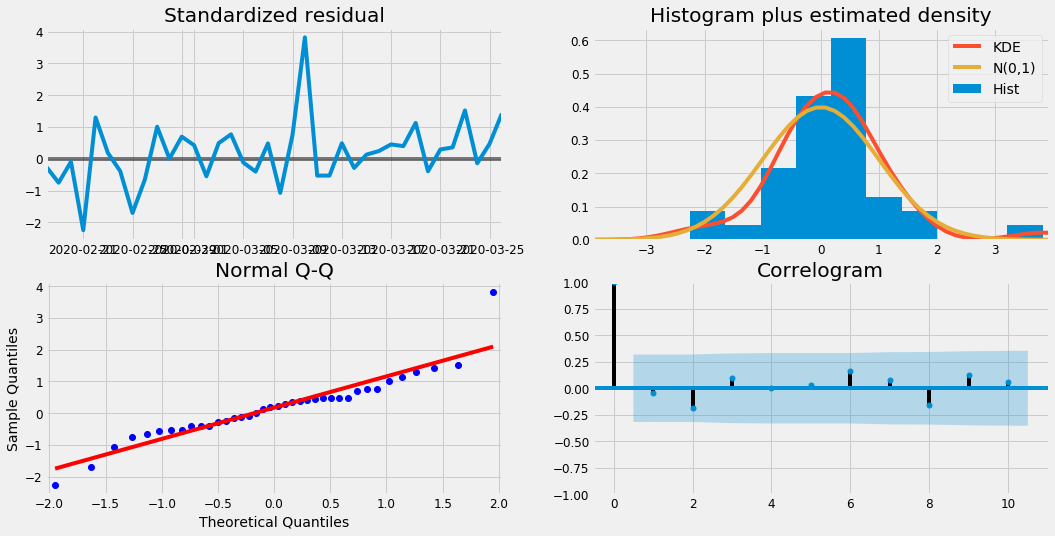

In [164]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Validating forecasts:

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [101]:
data.head()

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


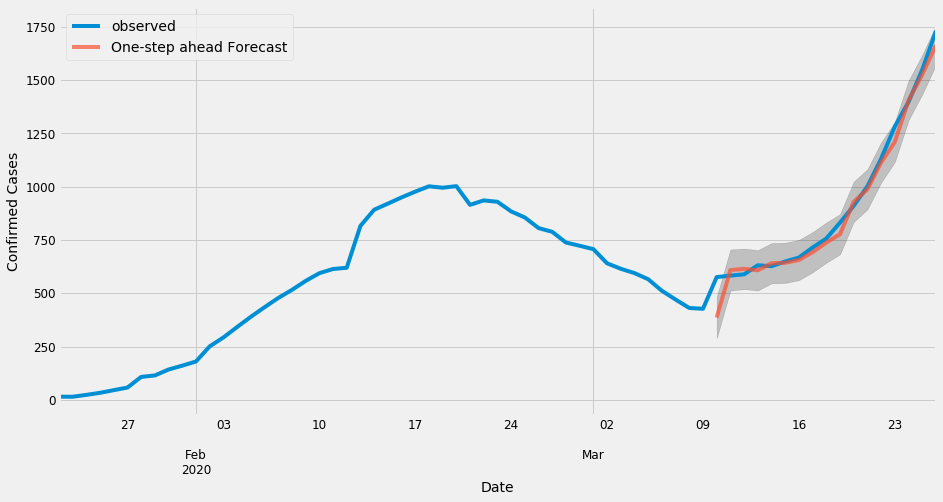

In [166]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [167]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-03-10':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3131.61


In [168]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 55.96


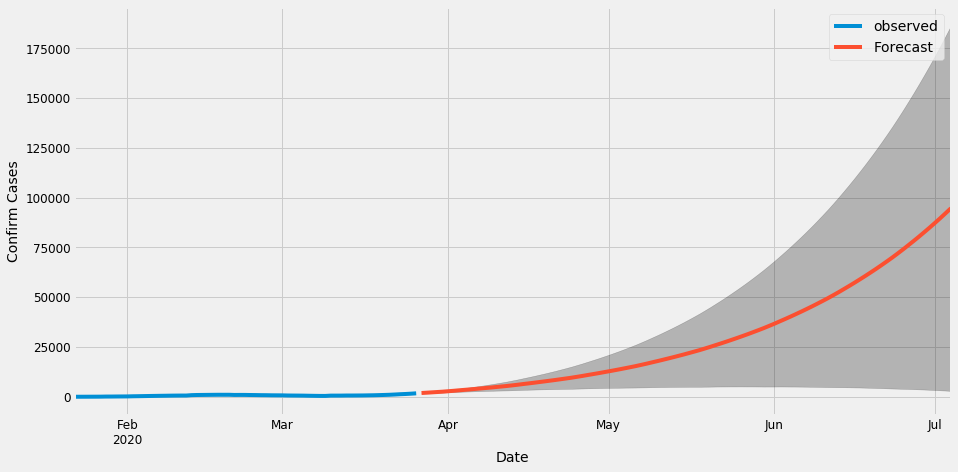

In [169]:
#Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirm Cases')
plt.legend()
plt.show()

In [171]:
pred_ci

,lower Confirmed,upper Confirmed
2020-03-27,1801.826940,1986.646497
2020-03-28,1888.279503,2213.950158
2020-03-29,1987.471348,2468.103199
2020-03-30,2071.630201,2723.831927
2020-03-31,2147.880780,2988.504706
...,...,...
2020-06-30,3515.098619,166360.001383
2020-07-01,3393.033883,171200.334827
2020-07-02,3252.972999,176151.544818
2020-07-03,3121.221834,181242.821612
